## IMPORT

In [0]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import matplotlib.pyplot as plt
import seaborn as sb


Data Preprocessing

In [0]:
train = pd.read_csv('./fifa2018.csv')

# Drop unused columns such as player number, photos of player, National flag, or Club flag
train=train.drop(['Unnamed: 0','ID','Photo', 'Flag', 'Club Logo', 'Body Type', 'Real Face', 'Joined', 'Contract Valid Until', 'Jersey Number'],axis=1)

# train.isna().sum()
# Above code shows that too many NULL are in Loaned Form column and Release Clause column
train=train.drop(['Nationality', 'Club', 'Release Clause', 'Loaned From'],axis=1)

# I want to exclude goalkeepers.
train=train.drop(train[train.Position == 'GK'].index)
# I also want to exclude ability for goalkeeper when clustering players
train=train.drop(['GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1)

# Since Value and Wage are string, I need preprocessing to make it number
train['Value'] = train['Value'].map(lambda x: x.lstrip('€'))
train['Wage'] = train['Wage'].map(lambda x: x.lstrip('€'))
train.loc[train.Value.str.endswith('K')==True, 'Multiply'] = 1000 
train.loc[train.Value.str.endswith('M')==True, 'Multiply'] = 1000000
train['Value'] = train['Value'].map(lambda x: x.rstrip('KM'))
train['Wage'] = train['Wage'].map(lambda x: x.rstrip('KM'))
train['Value']=train['Value'].astype('float')
train['Value']=train['Value']*train['Multiply']
train['Wage']=train['Wage'].astype('float')
train['Wage']=train['Wage']*train['Multiply']
train=train.drop(['Multiply'],axis=1)

# Save dataframe for further using
copy_train=train.copy()

# Drop columns related to postions because I need only play style abilities
train=train.drop(['Position', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB'], axis=1)

# In my opinion, it's good to exclude below things.
train=train.drop([ 'Work Rate', 'Height', 'Weight', 'Special', 'Overall', 'Potential', 'Preferred Foot', 'International Reputation' ],axis=1)
train=train.drop(['Value', 'Wage','Age'],axis=1)


# Drop all rows with NULL value in any column
train = train.dropna()

# Columns what I use for clustering
columns = ['Weak Foot', 'Skill Moves',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle']

# Making dataframe without player name
train_scaled=pd.DataFrame(columns=[columns])

# Standardizing play style abilities (mean = 0 , std = 1)
train_scaled[columns] = StandardScaler().fit_transform(train[columns])


Try three linkages

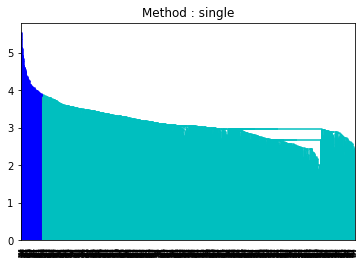

Cluster :  0  : TOTAL( 993 ) | DF( 309 ) | MF( 449 ) | FW( 235 )
Cluster :  1  : TOTAL( 1 ) | DF( 1 ) | MF( 0 ) | FW( 0 )
Cluster :  2  : TOTAL( 1 ) | DF( 1 ) | MF( 0 ) | FW( 0 )
Cluster :  3  : TOTAL( 1 ) | DF( 0 ) | MF( 0 ) | FW( 1 )
Cluster :  4  : TOTAL( 1 ) | DF( 1 ) | MF( 0 ) | FW( 0 )
Cluster :  5  : TOTAL( 1 ) | DF( 1 ) | MF( 0 ) | FW( 0 )
Cluster :  6  : TOTAL( 1 ) | DF( 1 ) | MF( 0 ) | FW( 0 )
Cluster :  7  : TOTAL( 1 ) | DF( 0 ) | MF( 0 ) | FW( 1 )


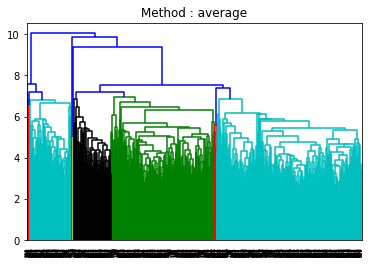

Cluster :  0  : TOTAL( 4 ) | DF( 0 ) | MF( 0 ) | FW( 4 )
Cluster :  1  : TOTAL( 419 ) | DF( 1 ) | MF( 190 ) | FW( 228 )
Cluster :  2  : TOTAL( 432 ) | DF( 173 ) | MF( 256 ) | FW( 3 )
Cluster :  3  : TOTAL( 126 ) | DF( 124 ) | MF( 2 ) | FW( 0 )
Cluster :  4  : TOTAL( 4 ) | DF( 4 ) | MF( 0 ) | FW( 0 )
Cluster :  5  : TOTAL( 4 ) | DF( 4 ) | MF( 0 ) | FW( 0 )
Cluster :  6  : TOTAL( 2 ) | DF( 0 ) | MF( 0 ) | FW( 2 )
Cluster :  7  : TOTAL( 9 ) | DF( 8 ) | MF( 1 ) | FW( 0 )


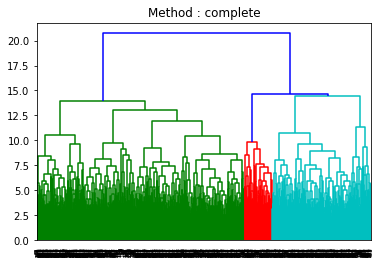

Cluster :  0  : TOTAL( 153 ) | DF( 3 ) | MF( 79 ) | FW( 71 )
Cluster :  1  : TOTAL( 189 ) | DF( 35 ) | MF( 151 ) | FW( 3 )
Cluster :  2  : TOTAL( 238 ) | DF( 151 ) | MF( 86 ) | FW( 1 )
Cluster :  3  : TOTAL( 82 ) | DF( 81 ) | MF( 1 ) | FW( 0 )
Cluster :  4  : TOTAL( 31 ) | DF( 15 ) | MF( 16 ) | FW( 0 )
Cluster :  5  : TOTAL( 143 ) | DF( 0 ) | MF( 10 ) | FW( 133 )
Cluster :  6  : TOTAL( 27 ) | DF( 27 ) | MF( 0 ) | FW( 0 )
Cluster :  7  : TOTAL( 137 ) | DF( 2 ) | MF( 106 ) | FW( 29 )


In [0]:
# Sadly, hierarchical clustering is not super fast.
# So I only used specific number of top players.
datasize=1000

# I tried three method regarding similarity : Single, Average, Complete linkage
for method in [ 'single', 'average','complete']:
  newtrain_scaled=pd.DataFrame(columns=[columns])
  newtrain_scaled=train[:datasize][columns]
  # Standardizing play style abilities (mean = 0 , std = 1)
  newtrain_scaled[columns] = StandardScaler().fit_transform(newtrain_scaled[columns])

  HC = linkage(newtrain_scaled, method=method, metric='euclidean')
  dendrogram(HC)
  plt.title("Method : "+method)
  plt.show()
  
  # I used 8 clusters, hoping it divdies players into 8 clusters having similar size
  clustersize=8
  clustering_results = cut_tree(HC, n_clusters=clustersize).reshape(-1,) 
  result_train=pd.DataFrame(columns=train.columns)
  result_train=train.drop(train.index[datasize:],axis=0)
  result_train['Cluster']=clustering_results

  temp_train=copy_train.copy()
  temp_train=temp_train.drop(temp_train.index[datasize:],axis=0)

  for i in range(clustersize):
    result_train['Position']=temp_train['Position']
    total=result_train[result_train.Cluster==i].count()['Name']
    df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
    mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']
    fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
    print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')

# It seems complete method is reasonable, because it divides into clusters in similar size.

Using best linkage : complete-linkage

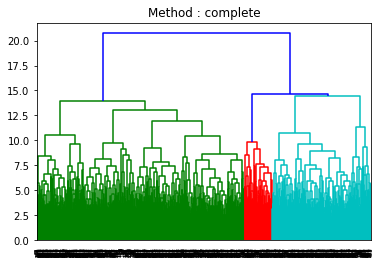

(1000,)


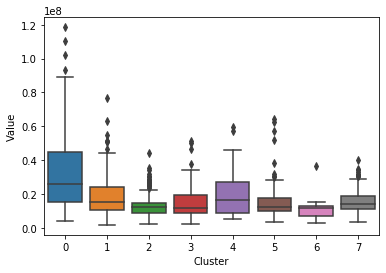

In [0]:

newtrain_scaled=pd.DataFrame(columns=[columns])
newtrain_scaled=train[:datasize][columns]
# Standardizing play style abilities (mean = 0 , std = 1)
newtrain_scaled[columns] = StandardScaler().fit_transform(newtrain_scaled[columns])

HC = linkage(newtrain_scaled, method='complete', metric='euclidean')
dendrogram(HC)
plt.title("Method : "+method)
plt.show()

# I used 8 clusters, hoping it divdies players into 8 clusters having similar size
clustersize=8
clustering_results = cut_tree(HC, n_clusters=clustersize).reshape(-1, )
result_train=pd.DataFrame(columns=train.columns)

result_train=train.drop(train.index[datasize:],axis=0)
print(clustering_results.shape)
result_train['Cluster']=clustering_results
result_train= pd.concat([result_train,copy_train[:datasize]['Value']],axis=1) # result_train['Value']=train[:datasize]['Value']
result_train.groupby(['Cluster']).mean()

# Show 'Value' of players in each cluster
sb.boxplot(x='Cluster', y='Value', data=result_train)

Show each cluster

In [0]:
# Trying to show 10 best players in each cluster
temp_train=copy_train.copy()
temp_train=temp_train.drop(temp_train.index[datasize:],axis=0)

for i in range(clustersize):
  result_train['Position']=temp_train['Position']
  total=result_train[result_train.Cluster==i].count()['Name']
  df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
  mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']
  
  fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
  print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
                

  #result_train.head()

  result_train[result_train.Cluster==i].head()
#result_train= pd.concat([result_train,copy_train[:datasize]['Value']],axis=1) # result_train['Value']=train[:datasize]['Value']
result_train = result_train[result_train.columns.tolist()[-1:]+result_train.columns.tolist()[:-1]]

Cluster :  0  : TOTAL( 153 ) | DF( 3 ) | MF( 79 ) | FW( 71 )
Cluster :  1  : TOTAL( 189 ) | DF( 35 ) | MF( 151 ) | FW( 3 )
Cluster :  2  : TOTAL( 238 ) | DF( 151 ) | MF( 86 ) | FW( 1 )
Cluster :  3  : TOTAL( 82 ) | DF( 81 ) | MF( 1 ) | FW( 0 )
Cluster :  4  : TOTAL( 31 ) | DF( 15 ) | MF( 16 ) | FW( 0 )
Cluster :  5  : TOTAL( 143 ) | DF( 0 ) | MF( 10 ) | FW( 133 )
Cluster :  6  : TOTAL( 27 ) | DF( 27 ) | MF( 0 ) | FW( 0 )
Cluster :  7  : TOTAL( 137 ) | DF( 2 ) | MF( 106 ) | FW( 29 )


In [0]:
#@title
i=0
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  0  : TOTAL( 153 ) | DF( 3 ) | MF( 79 ) | FW( 71 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
0,RF,L. Messi,4.0,4.0,84.0,95.0,70.0,90.0,86.0,97.0,...,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,0,110500000.0
1,ST,Cristiano Ronaldo,4.0,5.0,84.0,94.0,89.0,81.0,87.0,88.0,...,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,0,77000000.0
2,LW,Neymar Jr,5.0,5.0,79.0,87.0,62.0,84.0,84.0,96.0,...,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,0,118500000.0
4,RCM,K. De Bruyne,5.0,4.0,93.0,82.0,55.0,92.0,82.0,86.0,...,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,0,102000000.0
5,LF,E. Hazard,4.0,4.0,81.0,84.0,61.0,89.0,80.0,95.0,...,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,0,93000000.0
6,RCM,L. Modrić,4.0,4.0,86.0,72.0,55.0,93.0,76.0,90.0,...,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,0,67000000.0
7,RS,L. Suárez,4.0,3.0,77.0,93.0,77.0,82.0,88.0,87.0,...,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,0,80000000.0
10,ST,R. Lewandowski,4.0,4.0,62.0,91.0,85.0,83.0,89.0,85.0,...,39.0,91.0,77.0,88.0,86.0,34.0,42.0,19.0,0,77000000.0
13,LCM,David Silva,2.0,4.0,84.0,76.0,54.0,93.0,82.0,89.0,...,50.0,89.0,92.0,75.0,93.0,59.0,53.0,29.0,0,60000000.0
15,LF,P. Dybala,3.0,4.0,82.0,84.0,68.0,87.0,88.0,92.0,...,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,0,89000000.0


In [0]:
#@title
i=1
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  1  : TOTAL( 189 ) | DF( 35 ) | MF( 151 ) | FW( 3 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
8,RCB,Sergio Ramos,3.0,3.0,66.0,60.0,91.0,78.0,66.0,63.0,...,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,1,51000000.0
11,LCM,T. Kroos,5.0,3.0,88.0,76.0,54.0,92.0,82.0,81.0,...,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,1,76500000.0
14,LDM,N. Kanté,3.0,2.0,68.0,65.0,54.0,86.0,56.0,79.0,...,92.0,71.0,79.0,54.0,85.0,90.0,91.0,85.0,1,63000000.0
20,CDM,Sergio Busquets,3.0,3.0,62.0,67.0,68.0,89.0,44.0,80.0,...,87.0,77.0,87.0,60.0,90.0,90.0,86.0,80.0,1,51500000.0
49,LB,Jordi Alba,3.0,3.0,87.0,73.0,70.0,84.0,60.0,80.0,...,84.0,79.0,70.0,59.0,79.0,72.0,84.0,85.0,1,38000000.0
53,RCM,I. Rakitić,3.0,3.0,84.0,83.0,58.0,87.0,80.0,84.0,...,75.0,79.0,86.0,82.0,81.0,72.0,74.0,70.0,1,46500000.0
63,LCM,M. Verratti,4.0,4.0,72.0,60.0,55.0,90.0,64.0,90.0,...,84.0,71.0,87.0,64.0,93.0,78.0,83.0,80.0,1,55000000.0
64,LB,Alex Sandro,3.0,3.0,84.0,55.0,76.0,81.0,68.0,80.0,...,82.0,70.0,70.0,60.0,82.0,81.0,84.0,84.0,1,36500000.0
69,RB,Azpilicueta,3.0,2.0,81.0,46.0,76.0,81.0,51.0,69.0,...,89.0,62.0,74.0,66.0,78.0,88.0,90.0,86.0,1,35000000.0
72,CDM,M. Pjanić,4.0,3.0,80.0,60.0,60.0,89.0,72.0,86.0,...,78.0,70.0,88.0,79.0,86.0,75.0,74.0,70.0,1,44000000.0


In [0]:
#@title
i=2
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  2  : TOTAL( 238 ) | DF( 151 ) | MF( 86 ) | FW( 1 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
12,CB,D. Godín,3.0,2.0,55.0,42.0,92.0,79.0,47.0,53.0,...,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,2,44000000.0
89,CB,N. Otamendi,3.0,2.0,52.0,54.0,85.0,75.0,57.0,51.0,...,84.0,51.0,53.0,45.0,80.0,83.0,85.0,84.0,2,28500000.0
95,RCB,J. Boateng,4.0,2.0,69.0,34.0,85.0,75.0,52.0,64.0,...,81.0,47.0,75.0,46.0,84.0,84.0,87.0,87.0,2,30000000.0
107,CB,V. Kompany,3.0,2.0,61.0,45.0,84.0,73.0,46.0,63.0,...,82.0,41.0,59.0,63.0,81.0,87.0,85.0,84.0,2,22000000.0
113,LCB,A. Laporte,3.0,2.0,58.0,45.0,85.0,76.0,40.0,59.0,...,85.0,54.0,57.0,44.0,77.0,85.0,86.0,87.0,2,34000000.0
119,LDM,Marquinhos,3.0,2.0,72.0,33.0,80.0,81.0,31.0,59.0,...,84.0,46.0,51.0,31.0,79.0,85.0,87.0,87.0,2,35500000.0
123,RB,Carvajal,3.0,3.0,83.0,41.0,70.0,81.0,34.0,76.0,...,83.0,61.0,57.0,45.0,77.0,83.0,83.0,85.0,2,31500000.0
158,LCB,Josué Chiamulera,3.0,2.0,40.0,38.0,83.0,74.0,44.0,56.0,...,84.0,38.0,42.0,56.0,71.0,85.0,87.0,82.0,2,22500000.0
160,LCB,P. Kimpembe,3.0,3.0,62.0,31.0,79.0,79.0,33.0,58.0,...,83.0,39.0,60.0,50.0,80.0,80.0,83.0,83.0,2,30500000.0
182,RCB,J. Stones,4.0,3.0,62.0,29.0,83.0,81.0,27.0,69.0,...,81.0,48.0,67.0,44.0,80.0,85.0,85.0,82.0,2,28500000.0


In [0]:
#@title
i=3
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  3  : TOTAL( 82 ) | DF( 81 ) | MF( 1 ) | FW( 0 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
24,LCB,G. Chiellini,3.0,2.0,58.0,33.0,83.0,59.0,45.0,58.0,...,88.0,28.0,50.0,50.0,84.0,93.0,93.0,90.0,3,27000000.0
44,LCB,K. Koulibaly,3.0,2.0,30.0,19.0,81.0,66.0,14.0,66.0,...,88.0,24.0,43.0,33.0,78.0,91.0,88.0,86.0,3,51000000.0
62,RCB,R. Varane,3.0,2.0,36.0,40.0,83.0,75.0,42.0,57.0,...,82.0,44.0,56.0,43.0,82.0,87.0,88.0,87.0,3,50000000.0
73,CB,M. Benatia,3.0,2.0,45.0,47.0,83.0,65.0,44.0,64.0,...,86.0,38.0,47.0,41.0,82.0,89.0,87.0,85.0,3,30000000.0
77,LCB,M. Škriniar,4.0,2.0,40.0,42.0,80.0,70.0,40.0,59.0,...,86.0,30.0,57.0,56.0,80.0,92.0,88.0,82.0,3,46500000.0
88,LCB,K. Manolas,2.0,2.0,27.0,10.0,80.0,60.0,16.0,54.0,...,86.0,25.0,22.0,26.0,79.0,86.0,87.0,89.0,3,37500000.0
104,CB,Miranda,3.0,2.0,48.0,43.0,80.0,70.0,51.0,67.0,...,85.0,43.0,58.0,49.0,81.0,90.0,90.0,85.0,3,15500000.0
108,RCB,Pepe,3.0,2.0,46.0,46.0,80.0,70.0,23.0,58.0,...,85.0,40.0,48.0,57.0,79.0,86.0,85.0,82.0,3,9000000.0
110,RCB,D. Sánchez,3.0,2.0,36.0,40.0,80.0,77.0,28.0,63.0,...,82.0,34.0,49.0,44.0,75.0,84.0,85.0,88.0,3,34000000.0
111,RCB,J. Giménez,3.0,2.0,47.0,37.0,81.0,68.0,30.0,47.0,...,85.0,24.0,27.0,38.0,73.0,88.0,86.0,87.0,3,34000000.0


In [0]:
#@title
i=4
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  4  : TOTAL( 31 ) | DF( 15 ) | MF( 16 ) | FW( 0 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
27,CDM,Casemiro,3.0,2.0,52.0,59.0,76.0,85.0,53.0,69.0,...,87.0,69.0,77.0,66.0,84.0,88.0,90.0,87.0,4,59500000.0
34,LCB,M. Hummels,3.0,3.0,64.0,55.0,87.0,81.0,60.0,68.0,...,92.0,56.0,79.0,68.0,91.0,88.0,90.0,88.0,4,46000000.0
39,RCB,Thiago Silva,3.0,2.0,60.0,38.0,81.0,80.0,63.0,62.0,...,89.0,59.0,72.0,60.0,81.0,88.0,89.0,85.0,4,24000000.0
42,CB,S. Umtiti,3.0,2.0,69.0,51.0,79.0,81.0,70.0,69.0,...,87.0,58.0,58.0,61.0,82.0,90.0,89.0,86.0,4,57000000.0
51,LCB,J. Vertonghen,3.0,3.0,68.0,56.0,80.0,79.0,52.0,71.0,...,89.0,60.0,68.0,66.0,83.0,90.0,87.0,88.0,4,34000000.0
54,RCB,Piqué,3.0,2.0,57.0,64.0,83.0,81.0,57.0,59.0,...,88.0,58.0,62.0,69.0,86.0,91.0,86.0,84.0,4,34000000.0
59,LCB,V. van Dijk,3.0,2.0,53.0,52.0,82.0,76.0,45.0,70.0,...,86.0,41.0,59.0,62.0,83.0,88.0,89.0,84.0,4,44500000.0
70,RCB,L. Bonucci,3.0,2.0,44.0,48.0,86.0,77.0,58.0,69.0,...,90.0,38.0,74.0,70.0,86.0,90.0,86.0,80.0,4,30000000.0
71,RCB,T. Alderweireld,3.0,2.0,64.0,45.0,82.0,79.0,38.0,62.0,...,87.0,58.0,67.0,58.0,81.0,90.0,91.0,86.0,4,39000000.0
102,CB,Naldo,4.0,2.0,45.0,57.0,94.0,76.0,60.0,60.0,...,83.0,53.0,59.0,60.0,84.0,86.0,88.0,85.0,4,9000000.0


In [0]:
#@title
i=5
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  5  : TOTAL( 143 ) | DF( 0 ) | MF( 10 ) | FW( 133 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
38,LS,G. Higuaín,4.0,3.0,68.0,92.0,80.0,75.0,90.0,84.0,...,20.0,92.0,74.0,70.0,86.0,35.0,22.0,18.0,5,57000000.0
43,ST,M. Icardi,4.0,3.0,46.0,91.0,91.0,73.0,85.0,77.0,...,22.0,92.0,64.0,82.0,85.0,45.0,24.0,20.0,5,64500000.0
47,ST,R. Lukaku,3.0,3.0,78.0,87.0,86.0,77.0,79.0,80.0,...,27.0,89.0,76.0,78.0,83.0,30.0,30.0,30.0,5,62500000.0
48,ST,C. Immobile,4.0,3.0,55.0,90.0,81.0,74.0,87.0,83.0,...,40.0,91.0,65.0,78.0,81.0,34.0,33.0,32.0,5,52000000.0
98,ST,E. Džeko,5.0,2.0,63.0,89.0,84.0,77.0,77.0,76.0,...,50.0,89.0,74.0,67.0,83.0,58.0,28.0,16.0,5,30500000.0
100,LS,Diego Costa,4.0,2.0,65.0,87.0,82.0,65.0,81.0,77.0,...,40.0,87.0,74.0,75.0,83.0,58.0,39.0,34.0,5,38500000.0
109,RS,Z. Ibrahimović,4.0,5.0,73.0,86.0,83.0,79.0,86.0,79.0,...,20.0,85.0,79.0,89.0,90.0,28.0,37.0,24.0,5,14000000.0
139,ST,M. Mandžukić,3.0,3.0,72.0,84.0,90.0,75.0,86.0,76.0,...,66.0,90.0,74.0,76.0,80.0,59.0,64.0,64.0,5,25000000.0
148,RS,Falcao,4.0,3.0,55.0,86.0,89.0,79.0,84.0,75.0,...,41.0,88.0,70.0,81.0,87.0,39.0,42.0,19.0,5,25000000.0
159,ST,Louri Beretta,3.0,4.0,56.0,85.0,83.0,73.0,82.0,75.0,...,32.0,83.0,58.0,77.0,79.0,26.0,27.0,24.0,5,28500000.0


In [0]:
#@title
i=6
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  6  : TOTAL( 27 ) | DF( 27 ) | MF( 0 ) | FW( 0 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
115,CB,N. Süle,3.0,2.0,30.0,20.0,86.0,78.0,31.0,42.0,...,82.0,26.0,30.0,32.0,72.0,82.0,85.0,83.0,6,36500000.0
303,LCB,F. Fazio,2.0,2.0,44.0,41.0,89.0,64.0,35.0,48.0,...,85.0,32.0,47.0,26.0,86.0,85.0,85.0,78.0,6,15000000.0
307,RCB,E. Garay,3.0,2.0,62.0,58.0,80.0,69.0,49.0,60.0,...,83.0,42.0,63.0,69.0,78.0,82.0,83.0,81.0,6,15000000.0
308,LCB,Jardel,2.0,2.0,46.0,38.0,85.0,68.0,27.0,52.0,...,82.0,30.0,49.0,57.0,71.0,85.0,84.0,78.0,6,12500000.0
386,RCB,B. Höwedes,3.0,2.0,58.0,51.0,83.0,72.0,45.0,59.0,...,81.0,51.0,57.0,56.0,84.0,82.0,83.0,81.0,6,13000000.0
387,RCB,S. Kjær,3.0,2.0,54.0,55.0,82.0,73.0,37.0,46.0,...,79.0,31.0,49.0,61.0,69.0,83.0,82.0,78.0,6,14000000.0
422,RCB,F. Balbuena,3.0,2.0,33.0,31.0,82.0,71.0,24.0,47.0,...,80.0,27.0,45.0,48.0,74.0,82.0,82.0,76.0,6,15500000.0
431,CB,Raúl,3.0,2.0,56.0,50.0,86.0,68.0,49.0,56.0,...,81.0,46.0,53.0,51.0,75.0,78.0,82.0,76.0,6,12000000.0
455,CB,Z. Feddal,2.0,2.0,57.0,40.0,79.0,76.0,39.0,56.0,...,81.0,48.0,47.0,48.0,69.0,80.0,83.0,78.0,6,12000000.0
467,CB,J. Vestergaard,4.0,2.0,46.0,34.0,87.0,67.0,28.0,44.0,...,83.0,46.0,60.0,75.0,77.0,77.0,83.0,77.0,6,14500000.0


In [0]:
#@title
i=7
result_train['Position']=temp_train['Position']
total=result_train[result_train.Cluster==i].count()['Name']
df=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('B'))].count()['Name']
mf=result_train[(result_train.Cluster==i) & (result_train.Position.str.endswith('M'))].count()['Name']

fw=result_train[(result_train.Cluster==i) & ((result_train.Position.str.endswith('T')) |(result_train.Position.str.endswith('F')) | (result_train.Position.str.endswith('W')) | (result_train.Position.str.endswith('S')))].count()['Name']
print('Cluster : ', i,' : TOTAL(',total, ') | DF(',df,') | MF(',mf,') | FW(',fw,')')
              

#result_train.head()

result_train[result_train.Cluster==i].head(10)

Cluster :  7  : TOTAL( 137 ) | DF( 2 ) | MF( 106 ) | FW( 29 )


,Position,Name,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,...,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,Cluster,Value
155,RW,O. Dembélé,5.0,4.0,78.0,78.0,43.0,78.0,76.0,90.0,...,36.0,79.0,84.0,75.0,75.0,42.0,30.0,33.0,7,40000000.0
164,LM,K. Coman,3.0,5.0,81.0,76.0,52.0,77.0,77.0,88.0,...,23.0,79.0,75.0,70.0,75.0,29.0,17.0,15.0,7,34000000.0
170,RM,Q. Promes,4.0,5.0,79.0,86.0,60.0,78.0,69.0,84.0,...,33.0,79.0,81.0,74.0,78.0,36.0,30.0,32.0,7,30500000.0
173,LM,Y. Carrasco,4.0,4.0,78.0,79.0,53.0,77.0,68.0,88.0,...,18.0,81.0,71.0,74.0,75.0,58.0,39.0,26.0,7,33000000.0
176,LCM,M. Kovačić,4.0,4.0,73.0,62.0,42.0,87.0,76.0,88.0,...,78.0,69.0,88.0,59.0,72.0,69.0,75.0,63.0,7,35000000.0
185,LM,Felipe Anderson,4.0,4.0,79.0,71.0,44.0,80.0,68.0,90.0,...,69.0,73.0,79.0,53.0,82.0,47.0,60.0,54.0,7,31500000.0
186,RM,Lucas Moura,3.0,4.0,75.0,78.0,50.0,77.0,70.0,88.0,...,50.0,80.0,74.0,74.0,80.0,31.0,43.0,51.0,7,31000000.0
205,LCM,Oscar,3.0,4.0,74.0,76.0,54.0,86.0,63.0,78.0,...,45.0,79.0,83.0,68.0,75.0,66.0,52.0,47.0,7,30500000.0
234,LM,Gonçalo Guedes,3.0,4.0,76.0,75.0,60.0,77.0,71.0,86.0,...,50.0,77.0,77.0,69.0,80.0,24.0,34.0,30.0,7,29000000.0
244,LM,J. Brandt,4.0,4.0,77.0,78.0,42.0,82.0,66.0,87.0,...,29.0,78.0,83.0,54.0,69.0,38.0,20.0,24.0,7,30500000.0
